# the-impact-of-news-information-acquisitionn-and-cognitoin
## introduction
In contemporary society, the proliferation of news and information acquisition channels has had a profound impact on individual social attitudes and cognitive behaviors. The "2019 College Students' Social Mentality Survey," led by Dr. Ma Deyong, a professor of political science at Renmin University of China, is designed to explore how Chinese college students access news and information and the subsequent effect on their perception of societal, political, and economic issues. 

This survey spans a comprehensive range of topics, from basic demographic information of respondents, such as age, gender, and educational background, to their satisfaction with the country's political and economic state, and their trust and preference towards various news media channels. It also delves into students' interest in political news, the amount of time they spend on such news, and their views on the challenges faced by media outlets in delivering truthful reporting. 

The research based on the survey aims to explore the impact of consuming political news on college students' perceptions and sentiments about the current state of society.
### About Data
The data set from the "2019 College Student Information Perception Survey" contains 1,254 entries and 133 columns, indicating a comprehensive set of ques- tions addressed in the survey.


### Load Data


In [1]:
import pandas as pd
import os
current_directory = %pwd
data_relative_path = os.path.join(current_directory, 'data', 'interim')
data_file = os.path.join(data_relative_path, 'data.csv')
data = pd.read_csv(data_file)
index_of_valid_column = data.columns.get_loc('Q31')
index_of_time_column = data.columns.get_loc('time')
columns_to_keep = list(range(4, 27)) + [index_of_valid_column]+[index_of_time_column]
data = data[data.columns[columns_to_keep]]

#drop invalid sample
data = data[data['Q31']==7]
data = data[data['time']>=7]
data = data.drop(columns=['Q1','Q2','Q15_A3','Q15_A4','Q15_A5','Q15_A6','Q15_A7','Q15_A9','Q15_A10','Q15_A10_open'])


### Descriptive Data

In [2]:
current_directory = %pwd
data_relative_path = os.path.join(current_directory, 'data', 'processed')
data_file = os.path.join(data_relative_path, 'processed_data.csv')
data = pd.read_csv(data_file)
pd.set_option('display.max_columns', None)
description = data.describe()
print(description)

                Q3           Q4           Q5           Q6           Q7  \
count  1155.000000  1155.000000  1155.000000  1155.000000  1155.000000   
mean      1.592208     3.510823     2.150649     1.825108     2.237229   
std       0.491637     0.971257     0.388066     0.899004     0.649623   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000     4.000000     2.000000     1.000000     2.000000   
50%       2.000000     4.000000     2.000000     2.000000     2.000000   
75%       2.000000     4.000000     2.000000     3.000000     3.000000   
max       2.000000     4.000000     3.000000     4.000000     4.000000   

                Q8           Q9          Q10          Q11          Q12  \
count  1155.000000  1155.000000  1155.000000  1155.000000  1155.000000   
mean      5.145455     5.138528     5.773160     5.835498     5.285714   
std       1.620804     1.345715     0.807551     0.784791     0.907180   
min       3.000000     3.000000     3

### Visualization

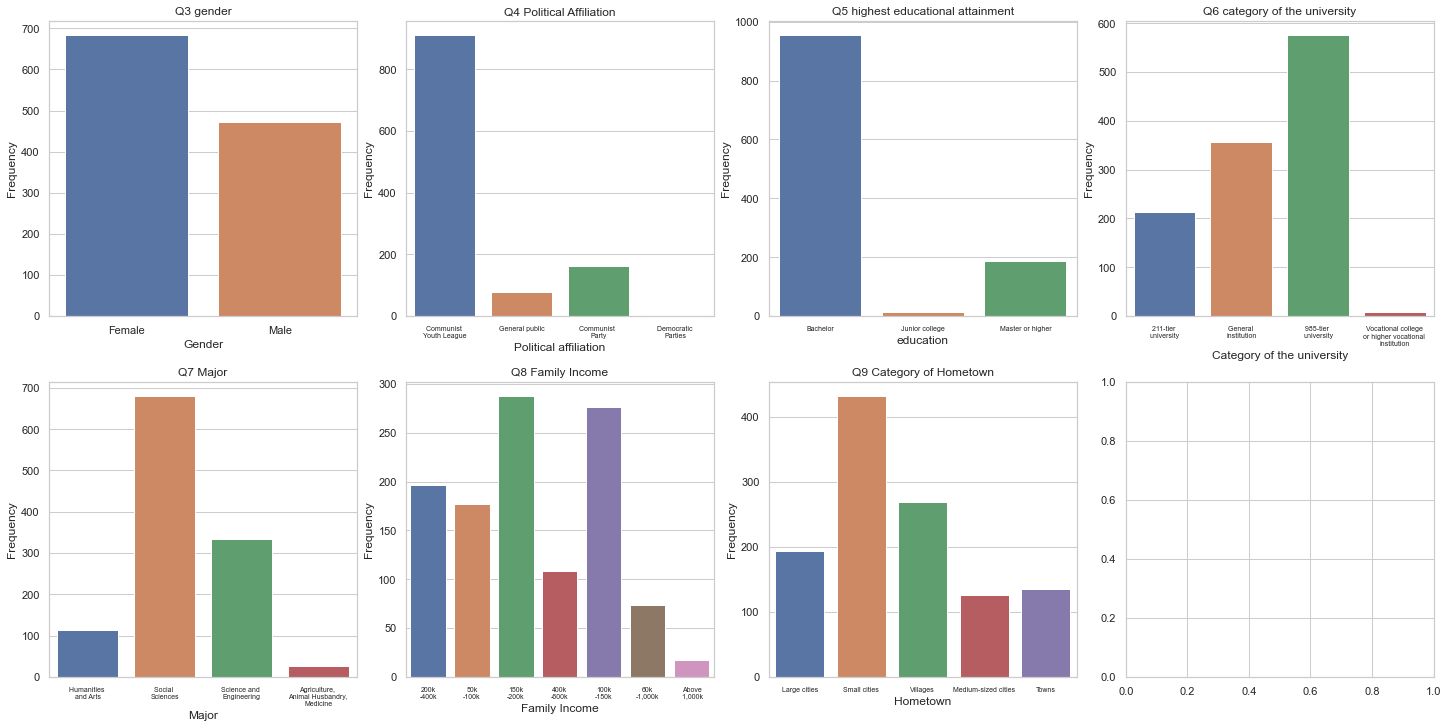

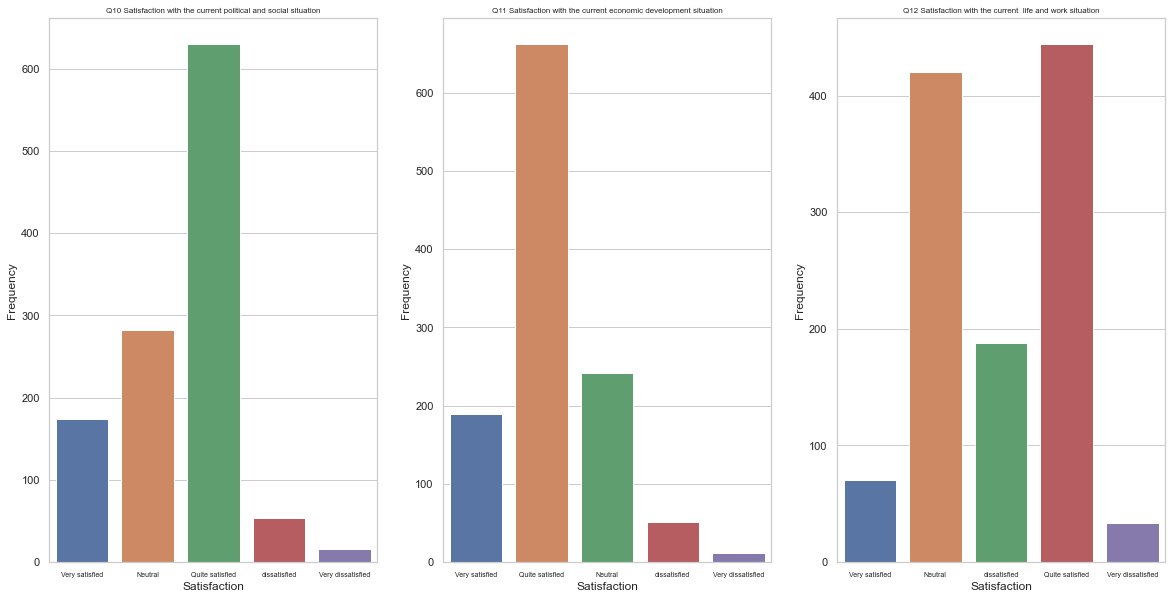

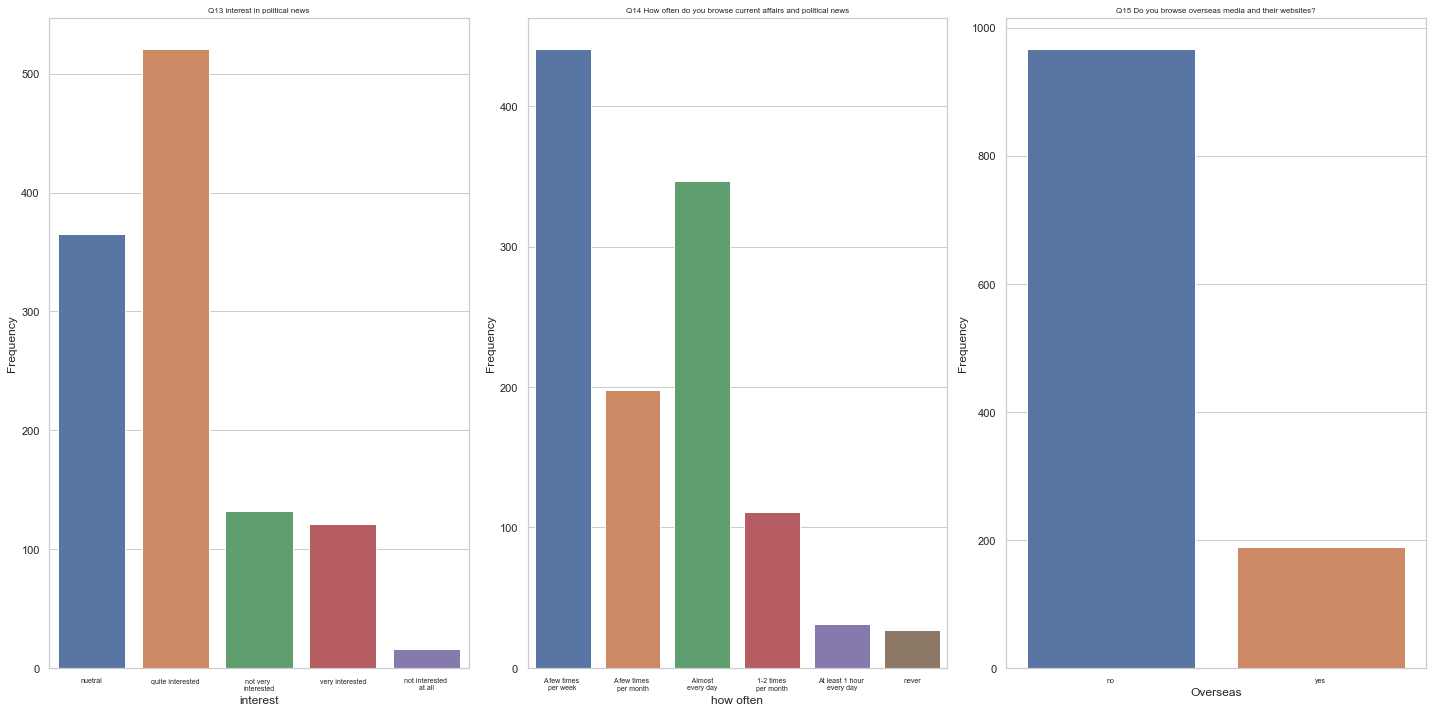

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='scipy')

sns.set(style="whitegrid")
#fig for control
fig, axes1 = plt.subplots(2, 4, figsize=(20, 10), constrained_layout=True)
#q3
gender_mapping = {1: 'Male', 2: 'Female'}
data['Q3_mapped'] = data['Q3'].map(gender_mapping)
sns.countplot(x='Q3_mapped', data=data,ax=axes1[0,0])
axes1[0, 0].set_title('Q3 gender')
axes1[0, 0].set_xlabel('Gender')
axes1[0, 0].set_ylabel('Frequency')

#q4
PA_mapping = {1:'General public',2:'Communist \nParty',3:'Democratic \nParties',4:'Communist \nYouth League'}
data['Q4_mapped'] = data['Q4'].map(PA_mapping)
sns.countplot(x='Q4_mapped', data=data,ax=axes1[0,1])
axes1[0, 1].set_title('Q4 Political Affiliation')
axes1[0, 1].set_xlabel('Political affiliation')
axes1[0, 1].set_ylabel('Frequency')
axes1[0, 1].tick_params(axis='x', labelsize=7)

#q5
Education_mapping = {1:'Junior college', 2: 'Bachelor', 3: 'Master or higher'}
data['Q5_mapped']=data['Q5'].map(Education_mapping)
sns.countplot(x='Q5_mapped', data=data,ax=axes1[0,2])
axes1[0, 2].set_title('Q5 highest educational attainment')
axes1[0, 2].set_xlabel('education')
axes1[0, 2].set_ylabel('Frequency')
axes1[0, 2].tick_params(axis='x', labelsize=7)

#q6
University_mapping = {1: '985-tier \nuniversity',2: '211-tier \nuniversity',3:'General \ninstitution', 4:'Vocational college \nor higher vocational \ninstitution'}
data['Q6_mapped']=data['Q6'].map(University_mapping)
sns.countplot(x='Q6_mapped', data=data,ax=axes1[0,3])
axes1[0, 3].set_title('Q6 category of the university')
axes1[0, 3].set_xlabel('Category of the university')
axes1[0, 3].set_ylabel('Frequency')
axes1[0, 3].tick_params(axis='x', labelsize=7)
#q7
Major_mapping = {1: 'Humanities \nand Arts',2: 'Social \nSciences',3: 'Science and \nEngineering',4: 'Agriculture, \nAnimal Husbandry, \nMedicine'}
data['Q7_mapped']=data['Q7'].map(Major_mapping)
sns.countplot(x='Q7_mapped', data=data,ax=axes1[1,0])
axes1[1, 0].set_title('Q7 Major')
axes1[1, 0].set_xlabel('Major')
axes1[1, 0].set_ylabel('Frequency')
axes1[1, 0].tick_params(axis='x', labelsize=7)
#q8
Income_mapping = {1: 'Below 20k',2: '20k\n-50k' ,3: '50k\n-100k',4: '100k\n-150k',5: '150k\n-200k',
                  6:'200k\n-400k',7: '400k\n-600k',8: '60k\n-1,000k', 9:'Above\n 1,000k'}
data['Q8_mapped']=data['Q8'].map(Income_mapping)
sns.countplot(x='Q8_mapped', data=data,ax=axes1[1,1])
axes1[1, 1].set_title('Q8 Family Income')
axes1[1, 1].set_xlabel('Family Income')
axes1[1, 1].set_ylabel('Frequency')
axes1[1, 1].tick_params(axis='x', labelsize=7)
#q9
Hometown_mapping = {3: 'Large cities', 4: 'Medium-sized cities',5: 'Small cities',6:'Towns',7: 'Villages', 8: 'Overseas'}
data['Q9_mapped']=data['Q9'].map(Hometown_mapping)
sns.countplot(x='Q9_mapped', data=data,ax=axes1[1,2])
axes1[1, 2].set_title('Q9 Category of Hometown')
axes1[1, 2].set_xlabel('Hometown')
axes1[1, 2].set_ylabel('Frequency')
axes1[1, 2].tick_params(axis='x', labelsize=7)

#dependent variable
fig, axes2 = plt.subplots(1, 3, figsize=(20, 10))
#q10
PS_mapping = {3: 'Very dissatisfied', 4: 'dissatisfied', 5: 'Neutral', 6: 'Quite satisfied',7: 'Very satisfied'}
data['Q10_mapped']=data['Q10'].map(PS_mapping)
sns.countplot(x='Q10_mapped', data=data,ax=axes2[0])
axes2[0].set_title('Q10 Satisfaction with the current political and social situation',fontsize=8)
axes2[0].set_xlabel('Satisfaction')
axes2[0].set_ylabel('Frequency')
axes2[0].tick_params(axis='x', labelsize=7)
#q11
econ_mapping = {3: 'Very dissatisfied', 4: 'dissatisfied', 5: 'Neutral', 6: 'Quite satisfied',7: 'Very satisfied'}
data['Q11_mapped']=data['Q11'].map(econ_mapping)
sns.countplot(x='Q11_mapped', data=data,ax=axes2[1])
axes2[1].set_title('Q11 Satisfaction with the current economic development situation',fontsize=8)
axes2[1].set_xlabel('Satisfaction')
axes2[1].set_ylabel('Frequency')
axes2[1].tick_params(axis='x', labelsize=7)
#q12
life_mapping = {3: 'Very dissatisfied', 4: 'dissatisfied', 5: 'Neutral', 6: 'Quite satisfied',7: 'Very satisfied'}
data['Q12_mapped']=data['Q12'].map(life_mapping)
sns.countplot(x='Q12_mapped', data=data,ax=axes2[2])
axes2[2].set_title('Q12 Satisfaction with the current  life and work situation',fontsize=8)
axes2[2].set_xlabel('Satisfaction')
axes2[2].set_ylabel('Frequency')
axes2[2].tick_params(axis='x', labelsize=7)

#independent variable
fig, axes3 = plt.subplots(1, 3, figsize=(20, 10))
#q13
interest_mapping = {3: 'not interested \nat all', 4: 'not very \ninterested', 5: 'nuetral', 6: 'quite interested',7: 'very interested'}
data['Q13_mapped']=data['Q13'].map(interest_mapping)
sns.countplot(x='Q13_mapped', data=data,ax=axes3[0])
axes3[0].set_title('Q13 interest in political news',fontsize=8)
axes3[0].set_xlabel('interest')
axes3[0].set_ylabel('Frequency')
axes3[0].tick_params(axis='x', labelsize=7)
#q14
browse_mapping = {3: 'never', 4: '1-2 times \nper month', 5: 'A few times \nper month', 6: 'A few times \nper week',7: ' Almost \nevery day',8:'At least 1 hour \nevery day'}
data['Q14_mapped']=data['Q14'].map(browse_mapping)
sns.countplot(x='Q14_mapped', data=data,ax=axes3[1])
axes3[1].set_title('Q14 How often do you browse current affairs and political news',fontsize=8)
axes3[1].set_xlabel('how often')
axes3[1].set_ylabel('Frequency')
axes3[1].tick_params(axis='x', labelsize=7)
#q15_A8
browse_mapping = {0:'no',1:'yes'}
data['Q15_mapped']=data['Q15_A8'].map(browse_mapping)
sns.countplot(x='Q15_mapped', data=data,ax=axes3[2])
axes3[2].set_title('Q15 Do you browse overseas media and their websites?',fontsize=8)
axes3[2].set_xlabel('Overseas')
axes3[2].set_ylabel('Frequency')
axes3[2].tick_params(axis='x', labelsize=7)
plt.tight_layout()
plt.show()

## Hypothesis
### Regression
$$ pol\_sat = \beta_0+ \beta_1 \cdot \text{interest} + \beta_2 \cdot \text{time} + \beta_3 \cdot \text{overseas} + \gamma \cdot \text{controls} + \epsilon_1 \nonumber  $$
$$ eco\_sati = \beta_0 + \beta_1 \cdot \text{interest} + \beta_2 \cdot \text{time} + \beta_3 \cdot \text{overseas} + \gamma \cdot \text{controls} + \epsilon_2 \nonumber  $$
$$ lif\_work\_sati = \beta_0 + \beta_1 \cdot \text{interest} + \beta_2 \cdot \text{time} + \beta_3 \cdot \text{overseas} + \gamma \cdot \text{controls} + \epsilon_3 \nonumber  $$

Where,
\begin{align*}
\text{pol_sat} & : \text{Political satisfaction} \\
\text{eco_sati} & : \text{Economic satisfaction} \\
\text{lif_work_sati} & : \text{Life and work satisfaction} \\
\beta_0 & :\text{intercept} \\
\beta_1, \beta_2, \beta_3 & : \text{Regression coefficients} \\
\gamma & : \text{Coefficient for the control variables} \\
\text{controls} & : \text{Vector of control variables} \\
\epsilon_1, \epsilon_2, \epsilon_3 & : \text{Error terms, unexplained factors in the model}
\end{align*}

We constructed three regression models to explore the determinants of political satisfaction (pol\_sat), economic satisfaction (eco\_sati), and life work satisfaction (lif\_work\_sati). These models integrate respondents' demographic details, including age, gender, political affiliation, highest level of education, institution level, field of study, annual household income, and hometown, as control variables.

Moreover, the models incorporate individual factors such as interest in political news, time allocation, and exposure to overseas information as explanatory variables. The aim is to comprehensively investigate satisfaction levels in the domains of politics, economics, and life\&work, considering a spectrum of personal and behavioral aspects. This modeling approach establishes a robust framework for a nuanced understanding of the factors influencing individuals' satisfaction levels.

### Robustness
For the robustness check, an ordered logistic regression model is employed.

\begin{align}
\text{Logit}(P(\text{pol_sati} \leq j)) &= \alpha_j + \beta_1 \cdot \text{interest} + \beta_2 \cdot \text{time} + \beta_3 \cdot \text{overseas} + \gamma \cdot \text{controls} \nonumber \\
\text{Logit}(P(\text{eco_sati} \leq j)) &= \alpha_j + \beta_1 \cdot \text{interest} + \beta_2 \cdot \text{time} + \beta_3 \cdot \text{overseas} + \gamma \cdot \text{controls} \nonumber \\
\text{Logit}(P(\text{lif_work_sati} \leq j)) &= \alpha_j + \beta_1 \cdot \text{interest} + \beta_2 \cdot \text{time} + \beta_3 \cdot \text{overseas} + \gamma \cdot \text{controls} \nonumber
\end{align}

Where,
\begin{align*}
\text{Logit}(P(\text{pol_sati} \leq j)) & : \text{Ordered log-odds for political satisfaction} \\
\text{Logit}(P(\text{eco_sati} \leq j)) & : \text{Ordered log-odds for economic satisfaction} \\
\text{Logit}(P(\text{lif_work_sati} \leq j)) & : \text{Ordered log-odds for life and work satisfaction} \\
\alpha_j & : \text{Threshold parameters for different levels of satisfaction} \\
\beta_1, \beta_2, \beta_3 & : \text{Regression coefficients} \\
\gamma & : \text{Coefficient for the control variables} \\
\text{controls} & : \text{Vector of control variables}
\end{align*}

Here, each equation represents an ordered logit model of political satisfaction, economic satisfaction, and life\&work satisfaction at different satisfaction levels. The model covers threshold parameters ($\alpha_j$), regression coefficients ($\beta_1, \beta_2, \beta_3$) reflecting the effects of explanatory variables, and coefficients of control variables ($\gamma$) for each satisfaction level.

In this way, we are able to check the consistency of the estimated coefficients under different specifications and thus assess the robustness of the results. The inclusion of control variables ensures that any observed effects are robust to bias due to omitted variables

## Results
### OLS Regression

In [4]:
import statsmodels.api as sm
import numpy as np

In [5]:
print(data.head())
gender = data['Q3']
poli_afli = data['Q4']
hi_edu = data['Q5']
gra_uni = data['Q6']
hig_maj = data['Q7']
ann_inc = data['Q8']
hometown = data['Q9']
interest = data['Q13']
time = data['Q14']
overseas = data['Q15_A8']
pol_sati = data['Q10']
eco_sati = data['Q11']
lif_work_sati = data['Q12']
pol_sat = sm.OLS(pol_sati, sm.add_constant(pd.concat([gender, poli_afli, gra_uni, hig_maj, ann_inc, hometown, interest, time, overseas], axis=1))).fit()
eco_sati = sm.OLS(eco_sati, sm.add_constant(pd.concat([gender, poli_afli, gra_uni, hig_maj, ann_inc, hometown, interest, time, overseas], axis=1))).fit()
lif_work_sati = sm.OLS(lif_work_sati, sm.add_constant(pd.concat([gender, poli_afli, gra_uni, hig_maj, ann_inc, hometown, interest, time, overseas], axis=1))).fit()
print(pol_sat.summary())

   Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  Q11  Q12  Q13  Q14  Q15_A8  Q31  time  \
0   2   4   2   2   1   6   3    7    7    7    5    6       0    7     7   
1   1   4   2   2   2   6   3    5    6    5    5    6       0    7     9   
2   2   4   2   2   2   6   3    5    7    4    6    6       0    7     9   
3   2   4   2   2   1   6   5    6    6    5    4    5       0    7     9   
4   1   4   2   2   1   3   7    6    6    4    6    6       0    7     8   

  Q3_mapped                 Q4_mapped Q5_mapped              Q6_mapped  \
0    Female  Communist \nYouth League  Bachelor  211-tier \nuniversity   
1      Male  Communist \nYouth League  Bachelor  211-tier \nuniversity   
2    Female  Communist \nYouth League  Bachelor  211-tier \nuniversity   
3    Female  Communist \nYouth League  Bachelor  211-tier \nuniversity   
4      Male  Communist \nYouth League  Bachelor  211-tier \nuniversity   

               Q7_mapped    Q8_mapped     Q9_mapped       Q10_mapped  \
0  Humanities \nand 

#### Analysis
The findings in Table 1 reveal that the p-values associated with all three explanatory variables are below the conventional significance threshold of 0.05. This suggests that each of these variables is statistically significant. Specifically, the coefficient for Q13 (interest in political news) is estimated at 0.1652. This implies that, while keeping all other variables constant, a one-unit increase in students' interest in political news corresponds to a 0.1652 unit rise in their satisfaction with politics (pol\_sati). Q14 has a coefficient of indicates that the more frequently political news is read, political satisfaction decreases by 0.0237 units. Similarly, the more exposure to overseas news, the less satisfied they are with politics, decreasing by 0.1993 units.

In [6]:
print(eco_sati.summary())

                            OLS Regression Results                            
Dep. Variable:                    Q11   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     5.880
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           4.75e-08
Time:                        16:15:08   Log-Likelihood:                -1332.4
No. Observations:                1155   AIC:                             2685.
Df Residuals:                    1145   BIC:                             2735.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2327      0.292     17.939      0.0

According to results in Table 2, the positive coefficient of 0.1451 for Q13(interest in political news) suggests that, holding other variables constant, a one-unit increase in students' interest in political news is associated with a 0.1451 unit increase in satisfaction with economy. The coefficient for Q14 is -0.0237, indicating that there is no statistically significant relationship between time allocation (Q14) and satisfaction with economy, as the P-value is 0.381.The negative coefficient of -0.1993 for Q15\_A8 suggests that, holding other variables constant, a one-unit increase in exposure to overseas information is associated with a 0.1993 unit decrease in satisfaction with economy. The P-value of 0.002 indicates that this relationship is statistically significant.

In [7]:
print(lif_work_sati.summary())

                            OLS Regression Results                            
Dep. Variable:                    Q12   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     7.676
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           5.18e-11
Time:                        16:15:11   Log-Likelihood:                -1492.0
No. Observations:                1155   AIC:                             3004.
Df Residuals:                    1145   BIC:                             3055.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5699      0.335     13.644      0.0

The results in Table 3 provide insights into the coefficients of the explanatory variables Q13, Q14, and Q15\_A8 for the dependent variable Q12(life\&work satisfaction).The positive coefficient of 0.1974 for Q13 suggests that, holding other variables constant, a one-unit increase in students' interest in political news is associated with a 0.1974 unit increase in satisfaction with life\&work.The coefficient for Q14 is -0.0371, indicating that there is no statistically significant relationship between time allocation (Q14) and satisfaction with life\&work, as the P-value is 0.233.The negative coefficient of -0.1233 for Q15\_A8 suggests that, holding other variables constant, a one-unit increase in exposure to overseas information is associated with a 0.1233 unit decrease in satisfaction with life\&work. The P-value of 0.093 indicates a marginal level of significance.


In [ ]:
#### Robust Test

In [9]:
response_variable1 = 'Q10'
predictors1 = ['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q13', 'Q14', 'Q15_A8']

mlogit_model1 = sm.MNLogit(data[response_variable1], sm.add_constant(data[predictors1]))
result1 = mlogit_model1.fit()
print(result1.summary())

response_variable2 = 'Q11'
predictors2 = ['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q13', 'Q14', 'Q15_A8']

mlogit_model2 = sm.MNLogit(data[response_variable2], sm.add_constant(data[predictors2]))
result2 = mlogit_model2.fit()
print(result2.summary())

response_variable3 = 'Q12'
predictors3 = ['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q13', 'Q14', 'Q15_A8']

mlogit_model3 = sm.MNLogit(data[response_variable3], sm.add_constant(data[predictors3]))
result3 = mlogit_model3.fit()
print(result3.summary())

Optimization terminated successfully.
         Current function value: 1.088416
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                    Q10   No. Observations:                 1155
Model:                        MNLogit   Df Residuals:                     1111
Method:                           MLE   Df Model:                           40
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                 0.06228
Time:                        16:17:41   Log-Likelihood:                -1257.1
converged:                       True   LL-Null:                       -1340.6
Covariance Type:            nonrobust   LLR p-value:                 1.894e-17
     Q10=4       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.6108      4.275     -1.312      0.189     -13.990       2.768
Q3             0.0346      0.

### Interactive Visualization
This simple interactive component displays the correlation of key variables in an interactive way and uses a unified color scale to represent it.
#### Parameters

In [11]:
from ipywidgets import interact, widgets
explanatory_variables = ['Q13', 'Q14', 'Q15_A8']
response_variables = ['Q10', 'Q11', 'Q12']
explanatory_variable_checkbox = widgets.Dropdown(options=explanatory_variables, value=explanatory_variables[0], description='Explanatory Variable:')
response_variable_checkbox = widgets.Dropdown(options=response_variables, value=response_variables[0], description='Response Variable:')


#### define functions

In [14]:
def create_heatmap(selected_explanatory_var, selected_response_var):
    selected_data = data[[selected_explanatory_var, selected_response_var]]

    plt.figure(figsize=(8, 6))
    sns.heatmap(selected_data.corr(), annot=True, cmap='coolwarm', linewidths=.5, vmin=-1, vmax=1)
    plt.title('Heatmap of Correlation')
    plt.show()

#### interactive component

In [15]:
interact(create_heatmap, selected_explanatory_var=explanatory_variable_checkbox, selected_response_var=response_variable_checkbox);

interactive(children=(Dropdown(description='Explanatory Variable:', options=('Q13', 'Q14', 'Q15_A8'), value='Q…

## Conclusion
### Political Satisfaction
Interest in political news (Q13) has a positive effect on political satisfaction, with a coefficient of 0.1652. This means for every unit increase in interest in political news, political satisfaction increases by 0.1652 units, holding other variables constant.
Frequency of reading political news (Q14) has a slightly negative impact, decreasing political satisfaction by 0.0237 units for each unit increase in frequency.
Exposure to overseas news (Q15 A8) negatively impacts political satisfaction, with a coefficient of -0.1993. This suggests that more exposure to overseas news leads to a decrease in political satisfaction by 0.1993 units.

### Economic Satisfaction
Interest in political news (Q13) positively correlates with economic satisfaction, with a coefficient of 0.1451. An increase in interest in political news leads to a 0.1451 unit increase in economic satisfaction.
The time spent on news (Q14) does not have a statistically significant relationship with economic satisfaction, as indicated by the non-significant P-value.
Exposure to overseas news (Q15 A8) has a significant negative effect, with a coefficient of -0.1993. More exposure to overseas news decreases satisfaction with the economy by 0.1993 units.

### Political Satisfaction
Interest in political news (Q13) shows a positive correlation, with a coefficient of 0.1974. This implies that an increase in interest in political news is associated with a 0.1974 unit increase in satisfaction with life and work.
The time allocated to news (Q14) does not show a significant relationship with life and work satisfaction.
Exposure to overseas news (Q15 A8) has a negative impact, with a coefficient of -0.1233. Increasing exposure to overseas news is associated with a decrease in life and work satisfaction by 0.1233 units, although this relationship has a marginal level of significance
